#**Importing** **Section**


In [322]:
#import all libraries
import pandas as pd
import numpy as np

In [323]:
df = pd.read_excel('/content/student_helthcare_dataset_train.xlsx')

In [324]:
df.shape

(6050, 15)

In [325]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,-480,Urgent,2020-05-03,Penicillin,Abnormal
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,477,Urgent,2021-08-02,NaN,Normal
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal


In [326]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
6045,Lisa Richardson,50,Male,A+,Asthma,2018-12-23,Tamara Rogers,Henderson-Johnson,Cigna,9725.556429,258,Urgent,2019-01-16,Lipitor,Normal
6046,Monica Brooks,22,Female,B-,Diabetes,2020-03-07,Isaac Bell,Silva-Roth,Cigna,47725.059359,479,Emergency,2020-03-25,Paracetamol,Normal
6047,Tonya Pineda,82,Female,O-,Hypertension,2019-09-06,Daniel Zhang,Bowman Inc,Cigna,45814.581808,276,Elective,2019-09-14,Lipitor,Normal
6048,Angel Davis,53,Male,O+,Cancer,2021-06-05,Amy Jackson,Edwards Ltd,UnitedHealthcare,6052.482315,237,Emergency,2021-06-25,Paracetamol,Abnormal
6049,Scott Smith,64,Female,A+,Hypertension,2019-12-24,Dean Dalton,Cooper and Sons,Cigna,15914.248316,298,Emergency,2020-01-05,Paracetamol,Normal


In [327]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6050 non-null   object 
 1   Age                 6050 non-null   int64  
 2   Gender              6050 non-null   object 
 3   Blood Type          6050 non-null   object 
 4   Medical Condition   6041 non-null   object 
 5   Date of Admission   6050 non-null   object 
 6   Doctor              6050 non-null   object 
 7   Hospital            6050 non-null   object 
 8   Insurance Provider  6050 non-null   object 
 9   Billing Amount      6050 non-null   float64
 10  Room Number         6050 non-null   int64  
 11  Admission Type      6050 non-null   object 
 12  Discharge Date      6050 non-null   object 
 13  Medication          6042 non-null   object 
 14  Test Results        6050 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 709.1

#**Data Transformation**

#**Cleaning Data**

In [329]:
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     9
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            8
Test Results          0
dtype: int64


In [330]:
print(df.isnull().sum()/len(df) * 100)

Name                  0.000000
Age                   0.000000
Gender                0.000000
Blood Type            0.000000
Medical Condition     0.148760
Date of Admission     0.000000
Doctor                0.000000
Hospital              0.000000
Insurance Provider    0.000000
Billing Amount        0.000000
Room Number           0.000000
Admission Type        0.000000
Discharge Date        0.000000
Medication            0.132231
Test Results          0.000000
dtype: float64


In [331]:
df.describe()

,Age,Billing Amount,Room Number
count,6050.000000,6.050000e+03,6050.000000
mean,51.429752,2.158714e+04,300.270744
std,19.553034,2.940994e+05,118.031170
min,18.000000,-2.282298e+07,-492.000000
25%,35.000000,1.317240e+04,198.000000
50%,52.000000,2.507342e+04,300.500000
75%,68.000000,3.771203e+04,402.000000
max,85.000000,1.426107e+05,500.000000


In [332]:
df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,6050,6050,6050,6041,6050,6050,6050,6050,6050,6050,6042,6050
unique,5798,2,8,6,1756,5825,5425,5,3,1768,5,2
top,Joseph Smith,Female,A-,Cancer,2023-03-27,James Williams,Smith and Sons,Cigna,Urgent,2019-09-14,Penicillin,Abnormal
freq,4,3049,776,1048,11,4,12,1266,2065,11,1258,3099


In [333]:
#Filling NULL values with mode.
for column in ['Medical Condition', 'Medication']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [334]:
print(df.isnull().sum()/len(df) * 100)

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64


In [335]:
#Showing the outliers of Billing Amount Column before removing the outliers
import plotly.express as px
fig = px.box(df, x='Billing Amount', points='all')
fig.show()

In [336]:
#Printing the number of outliers.
q1 = np.percentile(df['Billing Amount'], 25)
q3 = np.percentile(df['Billing Amount'], 75)
norm_range = (q3 - q1) * 1.5
lower_outliers = df[df['Billing Amount'] < (q1 - norm_range)]
upper_outliers = df[df['Billing Amount'] > (q3 + norm_range)]
outliers = len(lower_outliers)+len(upper_outliers)
print(f"The number of outliers in : {outliers}")

The number of outliers in : 5


In [337]:
#Putting "Billing Amount" in the required range
q1 = np.percentile(df['Billing Amount'], 25)
q3 = np.percentile(df['Billing Amount'], 75)
iqr = (q3 - q1) * 1.5
df['Billing Amount'] = np.where(df['Billing Amount'] < (q1 - iqr), q1 - iqr, df['Billing Amount'])
df['Billing Amount'] = np.where(df['Billing Amount'] > (q3 + iqr), q3 + iqr, df['Billing Amount'])

In [338]:
#Showing the outliers of Billing Amount Column after removing the outliers
import plotly.express as px
fig = px.box(df, x='Billing Amount', points='all')
fig.show()

In [339]:
#Printing the number of outliers after removing it
q1 = np.percentile(df['Billing Amount'], 25)
q3 = np.percentile(df['Billing Amount'], 75)
norm_range = (q3 - q1) * 1.5
lower_outliers = df[df['Billing Amount'] < (q1 - norm_range)]
upper_outliers = df[df['Billing Amount'] > (q3 + norm_range)]
outliers = len(lower_outliers)+len(upper_outliers)
print(f"The number of outliers in : {outliers}")

The number of outliers in : 0


In [340]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
1,Chad Byrd,61,Male,B-,Cancer,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,-480,Urgent,2020-05-03,Penicillin,Abnormal
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,477,Urgent,2021-08-02,Penicillin,Normal
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal


In [341]:
# Remove duplicates on the data set
df.drop_duplicates(inplace=True)

In [342]:
df['Blood Type'].unique()

array(['O+', 'B-', 'O-', 'AB+', 'A+', 'A-', 'AB-', 'B+'], dtype=object)

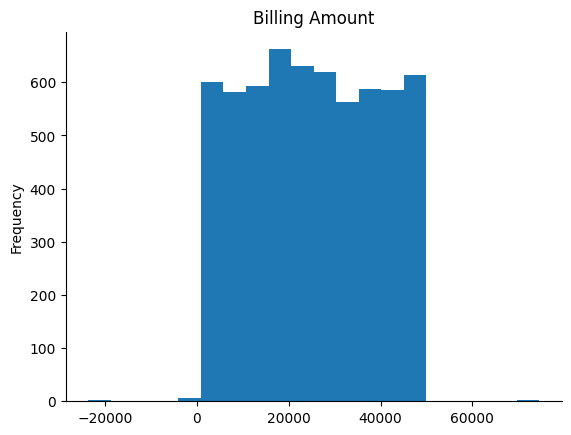

In [343]:
#showing out the zeroes and negative values.
from matplotlib import pyplot as plt
df['Billing Amount'].plot(kind='hist', bins=20, title='Billing Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [344]:
# Getting the index of the zeroes and negative values and dropping it.
index_to_drop = df[df['Billing Amount'] <= 0].index
df.drop(index_to_drop, inplace=True)

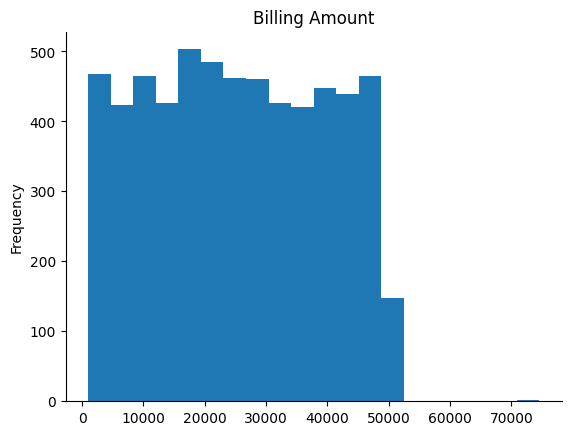

In [345]:
# The Histograph after droping the zeroes and negative values.
from matplotlib import pyplot as plt
df['Billing Amount'].plot(kind='hist', bins=20, title='Billing Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

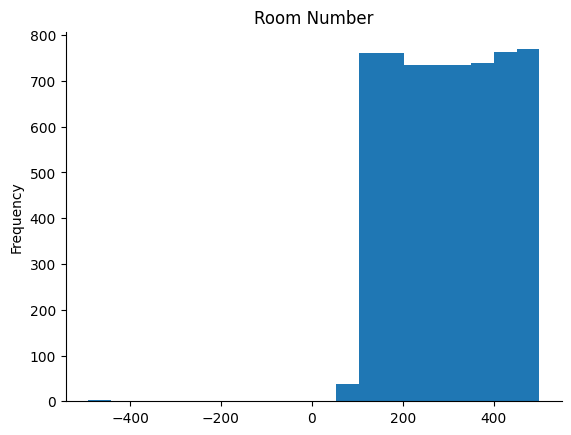

In [346]:
from matplotlib import pyplot as plt
df['Room Number'].plot(kind='hist', bins=20, title='Room Number')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [347]:
index_to_drop = df[df['Room Number'] <= 0].index
df.drop(index_to_drop, inplace=True)

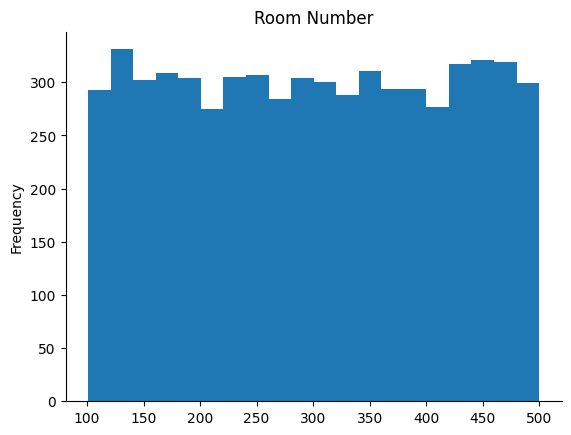

In [348]:
from matplotlib import pyplot as plt
df['Room Number'].plot(kind='hist', bins=20, title='Room Number')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [349]:
saving_file = df

In [350]:
saving_file.to_csv('filtered_data.csv', index=False)

#**Data Modeling**

_____________________________________________________________________

In [351]:
data = pd.read_csv("/content/filtered_data.csv")

In [352]:
# Generating ID for Patients
idPatients= range(1, len(data) + 1)
data['Patient ID'] = idPatients

In [353]:
Patient = []
Patient = data[['Patient ID','Name','Age','Gender','Blood Type']]

In [354]:
Patient.head()

,Patient ID,Name,Age,Gender,Blood Type
0,1,Ruben Burns,35,Male,O+
1,2,Patrick Parker,41,Male,AB+
2,3,Patty Norman,55,Female,O-
3,4,Ryan Hayes,33,Male,A+
4,5,Sharon Perez,39,Female,O-


In [355]:
pd.DataFrame(Patient)
Patient.to_csv('Patient Table.csv', index = False)

In [356]:
# Generating ID for Hospitals.
idHospital= range(1, len(data) + 1)
data['Hospital ID'] = idHospital

In [357]:
# The attribute for Hospital Table.
Hospitals = []
Hospitals = data[['Name','Hospital ID']]

In [358]:
Hospitals

,Name,Hospital ID
0,Ruben Burns,1
1,Patrick Parker,2
2,Patty Norman,3
3,Ryan Hayes,4
4,Sharon Perez,5
...,...,...
6029,Lisa Richardson,6030
6030,Monica Brooks,6031
6031,Tonya Pineda,6032
6032,Angel Davis,6033


In [359]:
pd.DataFrame(Hospitals)
Hospitals.to_csv('Hospitals Table.csv', index = False)

In [360]:
#  Generating ID for Doctors.
idDoctor= range(1, len(data) + 1)
data['Doctors ID'] = idDoctor

In [361]:
# The attributes for Doctor Table.
Doctor = []
Doctor = data[['Doctors ID' ,'Doctor' , 'Hospital ID']]

In [362]:
Doctor

,Doctors ID,Doctor,Hospital ID
0,1,Diane Jackson,1
1,2,Robin Green,2
2,3,Brian Kennedy,3
3,4,Kristin Dunn,4
4,5,Jessica Bailey,5
...,...,...,...
6029,6030,Tamara Rogers,6030
6030,6031,Isaac Bell,6031
6031,6032,Daniel Zhang,6032
6032,6033,Amy Jackson,6033


In [363]:
pd.DataFrame(Doctor)
Doctor.to_csv('Doctor Table.csv', index = False)

In [364]:
# The attributes for admition Table.
admited = []
admited = data[['Patient ID' , 'Hospital ID' , 'Admission Type' , 'Date of Admission', 'Discharge Date' , 'Room Number' ]]

In [365]:
admited

,Patient ID,Hospital ID,Admission Type,Date of Admission,Discharge Date,Room Number
0,1,1,Emergency,2023-06-01,2023-06-15,404
1,2,2,Urgent,2020-08-20,2020-08-23,180
2,3,3,Elective,2019-05-16,2019-06-02,384
3,4,4,Elective,2020-12-17,2020-12-22,215
4,5,5,Urgent,2022-12-15,2022-12-16,310
...,...,...,...,...,...,...
6029,6030,6030,Urgent,2018-12-23,2019-01-16,258
6030,6031,6031,Emergency,2020-03-07,2020-03-25,479
6031,6032,6032,Elective,2019-09-06,2019-09-14,276
6032,6033,6033,Emergency,2021-06-05,2021-06-25,237


In [366]:
pd.DataFrame(admited)
admited.to_csv('Admission Table.csv',index = False)

In [367]:
# The attributes for payment Table.
Payment = []
Payment  = data[['Patient ID' , 'Hospital ID' , 'Billing Amount' , 'Insurance Provider']]

In [368]:
Payment

,Patient ID,Hospital ID,Billing Amount,Insurance Provider
0,1,1,47304.064845,UnitedHealthcare
1,2,2,22522.363385,Aetna
2,3,3,13546.817249,Blue Cross
3,4,4,24903.037270,Aetna
4,5,5,22788.236026,Blue Cross
...,...,...,...,...
6029,6030,6030,9725.556429,Cigna
6030,6031,6031,47725.059359,Cigna
6031,6032,6032,45814.581808,Cigna
6032,6033,6033,6052.482315,UnitedHealthcare


In [369]:
pd.DataFrame(Payment)
Payment.to_csv('Payment Table.csv',index = False)

In [370]:
# the attributes for The Cure Table.
Cure = []
Cure = data[['Patient ID','Doctors ID', 'Hospital ID' , 'Medication']]

In [371]:
Cure

,Patient ID,Doctors ID,Hospital ID,Medication
0,1,1,1,Lipitor
1,2,2,2,Aspirin
2,3,3,3,Aspirin
3,4,4,4,Aspirin
4,5,5,5,Aspirin
...,...,...,...,...
6029,6030,6030,6030,Lipitor
6030,6031,6031,6031,Paracetamol
6031,6032,6032,6032,Lipitor
6032,6033,6033,6033,Paracetamol


In [372]:
pd.DataFrame(Cure)
Cure.to_csv('Cure Table.csv',index = False)

In [373]:
# The attributes for Diagnosed Table
Diagnosed = []
Diagnosed = data[['Patient ID','Doctors ID', 'Hospital ID' , 'Medical Condition' , 'Test Results']]

In [374]:
Diagnosed

,Patient ID,Doctors ID,Hospital ID,Medical Condition,Test Results
0,1,1,1,Asthma,Normal
1,2,2,2,Arthritis,Abnormal
2,3,3,3,Arthritis,Normal
3,4,4,4,Cancer,Abnormal
4,5,5,5,Asthma,Normal
...,...,...,...,...,...
6029,6030,6030,6030,Asthma,Normal
6030,6031,6031,6031,Diabetes,Normal
6031,6032,6032,6032,Hypertension,Normal
6032,6033,6033,6033,Cancer,Abnormal


In [375]:
pd.DataFrame(Diagnosed)
Diagnosed.to_csv('Diagnosed Table.csv', index = False)